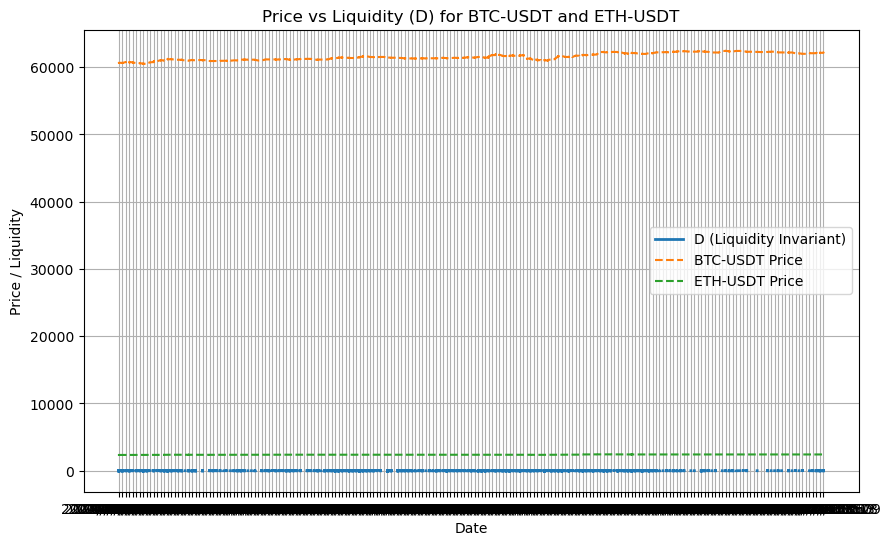

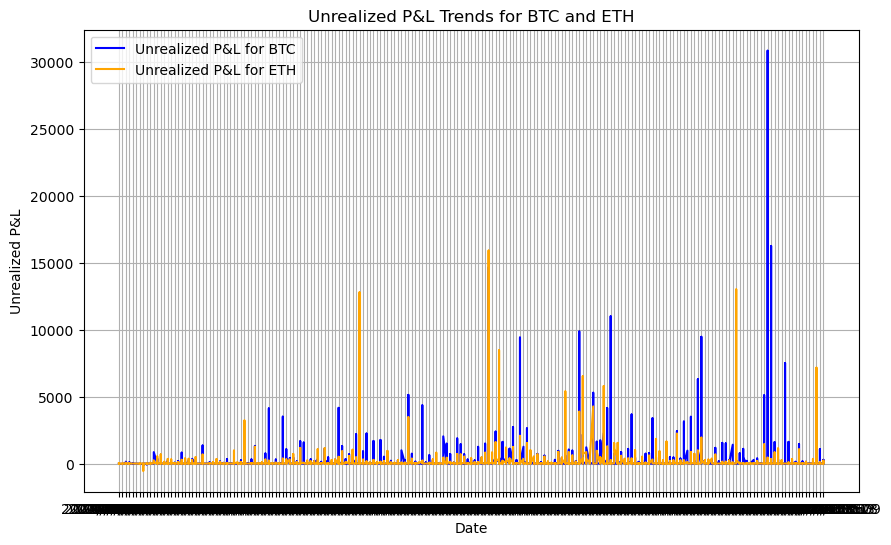

,Date,BTC_USDT_Price,ETH_USDT_Price,BTC_Amount,ETH_Amount,BTC_USDT_Value,ETH_USDT_Value,Sum_xi,D,BTC_Initial,ETH_Initial,Unrealized_PnL_BTC,Unrealized_PnL_ETH
0,2024/10/4 00:15,60695.1,2346.10,0.001802,0.005300,109.050504,12.397027,121.447531,0.111956,109.378640,12.434330,0.000000,0.000000
1,2024/10/4 00:15,60689.0,2345.74,0.067381,0.129377,4077.014627,302.574350,4379.588977,0.004424,4089.693498,303.531380,-0.411024,-0.046576
2,2024/10/4 00:15,60683.1,2345.16,0.134486,0.000100,8136.561245,0.233812,8136.795057,5.330280,8162.658213,0.234610,-1.613835,-0.000094
3,2024/10/4 00:15,60683.1,2345.04,0.781123,11.109032,47258.748916,25972.971028,73231.719944,0.000074,47410.325244,26062.899975,-9.373473,-11.775574
4,2024/10/4 00:15,60678.0,2345.04,0.000439,0.000000,26.580718,0.000000,26.580718,inf,26.668213,0.000000,-0.007513,0.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the provided CSV file
file_path = '/Users/charlie/Downloads/BTC_ETH_USDT.csv'
df = pd.read_csv(file_path)

# Constants
SWAP_FEE = 0.003  # 0.3% transaction fee

# Calculate BTC and ETH USDT values
df['BTC_USDT_Value'] = df['BTC_USDT_Price'] * df['BTC_Amount']
df['ETH_USDT_Value'] = df['ETH_USDT_Price'] * df['ETH_Amount']
df['Sum_xi'] = df['BTC_USDT_Value'] + df['ETH_USDT_Value']

# Amplification coefficient and number of assets
A = 1  # For simplicity
n = 2  # Number of assets (BTC and ETH)

# Calculate D invariant using a simplified formula
df['D'] = (A * n**n * df['Sum_xi'] + A * df['Sum_xi']) / (n**n * df['BTC_USDT_Value'] * df['ETH_USDT_Value'])

# Calculate initial values for unrealized P&L calculation
df['BTC_Initial'] = df['BTC_USDT_Price'][0] * df['BTC_Amount']
df['ETH_Initial'] = df['ETH_USDT_Price'][0] * df['ETH_Amount']

# Calculate Unrealized P&L for BTC and ETH
df['Unrealized_PnL_BTC'] = df['BTC_USDT_Value'] - df['BTC_Initial']
df['Unrealized_PnL_ETH'] = df['ETH_USDT_Value'] - df['ETH_Initial']

# Apply transaction fees for swaps
# Assuming swaps between BTC and ETH with a fee deducted from the output asset
# For this calculation, we assume swaps are made proportionally to adjust liquidity
btc_to_eth_fee_adjustment = df['BTC_USDT_Value'] * SWAP_FEE
eth_to_btc_fee_adjustment = df['ETH_USDT_Value'] * SWAP_FEE

df['BTC_USDT_Value'] -= btc_to_eth_fee_adjustment
df['ETH_USDT_Value'] -= eth_to_btc_fee_adjustment

# Recalculate Sum_xi after fee adjustments
df['Sum_xi'] = df['BTC_USDT_Value'] + df['ETH_USDT_Value']

# Plotting Price vs Liquidity (D)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['D'], label='D (Liquidity Invariant)', linewidth=2)
plt.plot(df['Date'], df['BTC_USDT_Price'], label='BTC-USDT Price', linestyle='--')
plt.plot(df['Date'], df['ETH_USDT_Price'], label='ETH-USDT Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price / Liquidity')
plt.title('Price vs Liquidity (D) for BTC-USDT and ETH-USDT')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Unrealized P&L Trends for BTC and ETH
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Unrealized_PnL_BTC'], label='Unrealized P&L for BTC', color='blue')
plt.plot(df['Date'], df['Unrealized_PnL_ETH'], label='Unrealized P&L for ETH', color='orange')
plt.xlabel('Date')
plt.ylabel('Unrealized P&L')
plt.title('Unrealized P&L Trends for BTC and ETH')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
output_path = '/Users/charlie/Downloads/Stable_Swap_AMM_Unrealized_PnL_Strategies.xlsx'
df.to_excel(output_path, index=False, sheet_name='Liquidity_Pool_Calculations')

# Display the first few rows of the DataFrame to ensure correct loading
df.head()
